In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
path = "e://python3/cv/"
file1="hand-bw.jpg"#"2.jpg"#"chang.png""checker128-var20.png"
file2="shapes-bw.jpg"
img1h=300
img1w=400
img2h=374
img2w=373
L=256
img1 = Image.open(path+str(file1)) 
imageMatrix1 = np.matrix(img1.getdata())
img2 = Image.open(path+str(file2)) 
imageMatrix2 = np.matrix(img2.getdata())
#imageMatrix1 = np.matrix(imageMatrix1,dtype=float)

In [2]:
def grey_kernel(matrix):   #greying the 1D RGB image
    res=np.zeros(matrix.shape[0],dtype=np.uint8)
    for i in range(matrix.shape[0]):
        grey=np.uint8(round(0.299*matrix[i,0]+0.587*matrix[i,1]+0.114*matrix[i,2]))#matrix[i,0]#
        res[i]=grey     
    return res

In [3]:
def rgb_kernel(squ_array):   #RGBing the 2D grey image
    res=np.zeros([squ_array.shape[0],squ_array.shape[1],3],dtype=np.uint8)
    scale=squ_array.max()-squ_array.min()                          #calibration for display.
    squ_array=(squ_array-squ_array.min())/scale*255
    for i in range(squ_array.shape[0]):
        for j in range(squ_array.shape[1]):
            res[i,j,0]=np.uint8(round(squ_array[i,j]))
            res[i,j,1]=np.uint8(round(squ_array[i,j]))
            res[i,j,2]=np.uint8(round(squ_array[i,j]))
    return res

In [4]:
def showpic(raw,target1,target2):       #show picture and save picture                                       
    fig=plt.figure(figsize=(15,5))    
    fig.add_subplot(131)
    plt.title("origin")
    plt.imshow(raw)
    fig.add_subplot(132)
    plt.title("filter 3 x 3")
    plt.imshow(target1,cmap=plt.cm.gray) 
    fig.add_subplot(133)
    plt.title("filter 5 x 5")
    plt.imshow(target2,cmap=plt.cm.gray) 
    

In [5]:
def showpic_g(raw,target1,name="gaussian filter 3 x 3"):       #show picture and save picture                                       
    fig=plt.figure(figsize=(15,5))    
    fig.add_subplot(121)
    plt.title("origin")
    plt.imshow(raw)
    fig.add_subplot(122)
    plt.title(name)
    plt.imshow(target1,cmap=plt.cm.gray)

In [6]:
def showpic_dxy(target1,target2,target3,target4):       #show picture and save picture                                       
    fig=plt.figure(figsize=(15,5))    
    fig.add_subplot(141)
    plt.title("dx")
    plt.imshow(target1,cmap=plt.cm.gray)
    fig.add_subplot(142)
    plt.title("dy")
    plt.imshow(target2,cmap=plt.cm.gray)
    fig.add_subplot(143)
    plt.title("edge map")
    plt.imshow(target3,cmap=plt.cm.gray)
    fig.add_subplot(144)
    plt.title("orientation map")
    plt.imshow(target4,cmap=plt.cm.gray)

In [7]:
def conv_2d(A,B,mode=1):
    C=np.zeros([B.shape[0]-A.shape[0] + 1 , B.shape[1]-A.shape[1] + 1],dtype=float)
    if(mode==1):
        for i in range(C.shape[0]):
            for j in range(C.shape[1]):
                C[i,j]=(A * B[i:i+A.shape[0],j:j+A.shape[1]]).sum()    #np.dot(A,Bxxx.T).trace()
    if(mode==2): 
        A=A-A.mean()                                                 #normalize the template ADD-square-SQRT,to match correlation<=1
        A=A/np.sqrt((A**2).sum())
        for i in range(C.shape[0]):
            for j in range(C.shape[1]):
                TEMP=B[i:i+A.shape[0],j:j+A.shape[1]]                #normalize the image window
                TEMP=TEMP-TEMP.mean()
                TEMP=TEMP/np.sqrt((TEMP**2).sum())
                C[i,j]=(A * TEMP).sum()
    return C

In [8]:
def squ_image(matrix,height,weight):
    res=np.array(matrix).reshape(height,weight)
    return res

In [9]:
#smooth kernel
sm_filter33=np.array(np.ones([3,3],dtype=float)) #python:    Matrix *Array *:stands for dot;  array*array:*stands for .*!!!!
sm_filter33/=9

sm_filter55=np.array(np.ones([5,5],dtype=float))
sm_filter55/=25

#gaussian kernel
sm_gauss=np.array([[1,2,1],[2,4,2],[1,2,1]],dtype=float)
sm_gauss/=16
dx=np.array([[-0.5,0,0.5]])
dy=np.array([[-0.5],[0],[0.5]])

#laplacian kernel
peak_lp=np.array([[0,-1,0], [-1,4,-1], [0,-1,0]],dtype=float)

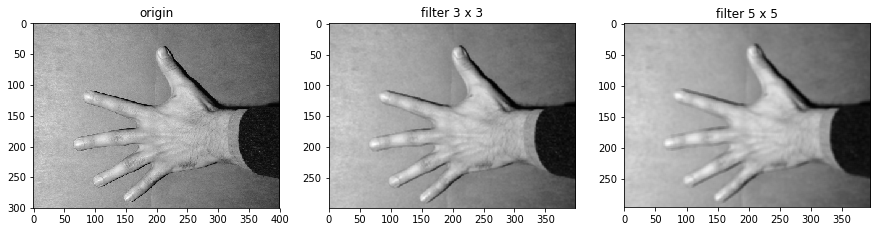

In [10]:
#smoothing
grey_lvl=grey_kernel(imageMatrix1)    #grey_lvl  [pixels,3]
squ=squ_image(grey_lvl,img1h,img1w)
C = conv_2d(sm_filter33,squ)
rgb_lvlC=rgb_kernel(C)
D = conv_2d(sm_filter55,squ)
rgb_lvlD=rgb_kernel(D)
showpic(img1,rgb_lvlC,rgb_lvlD)

plt.imsave('3x3 smooth.jpg',rgb_lvlC)
plt.imsave('5x5 smooth.jpg',rgb_lvlD)

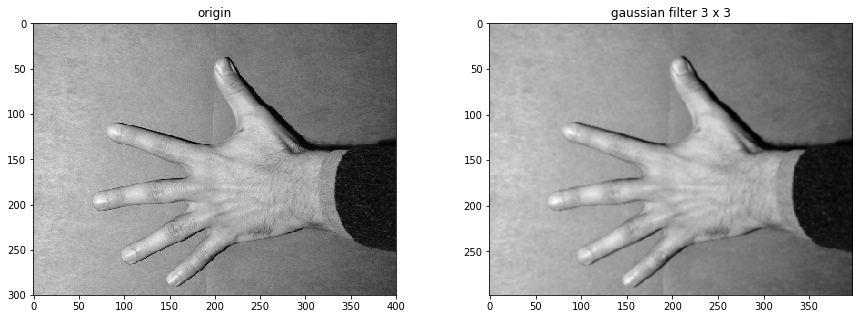

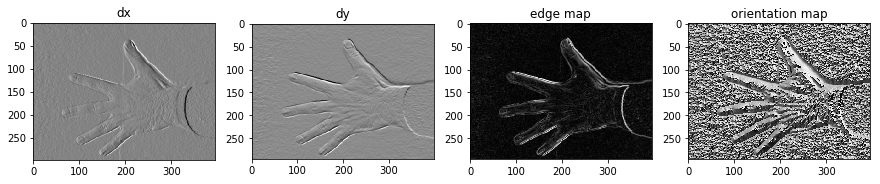

In [428]:
#edge detection

grey_lvl=grey_kernel(imageMatrix1)    #grey_lvl  [pixels,3]
squ=squ_image(grey_lvl,img1h,img1w)
C = conv_2d(sm_gauss,squ)
rgb_lvlC=rgb_kernel(C)
showpic_g(img1,rgb_lvlC)

edgeX=conv_2d(dx,C)
edgeY=conv_2d(dy,C)
edgeXY=np.sqrt(edgeX[:-2,:]**2+edgeY[:,:-2]**2)
angleXY=np.arctan2(edgeY[:,:-2],edgeX[:-2,:])

rgb_lvlX=rgb_kernel(edgeX)  
rgb_lvlY=rgb_kernel(edgeY)
rgb_lvlXY=rgb_kernel(edgeXY)            #40 for image display
showpic_dxy(rgb_lvlX,rgb_lvlY,rgb_lvlXY,angleXY)

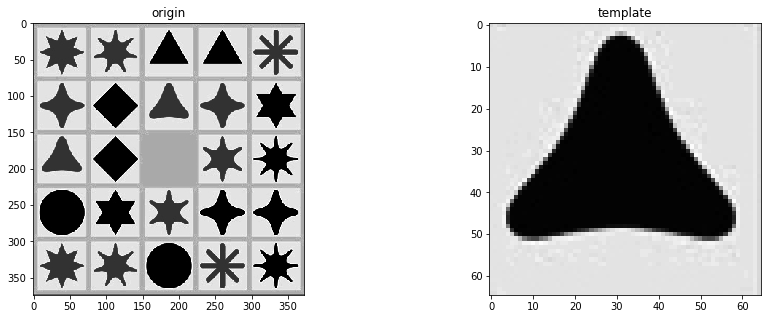

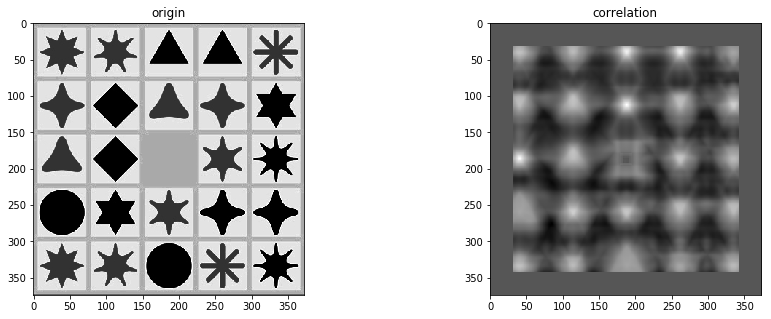

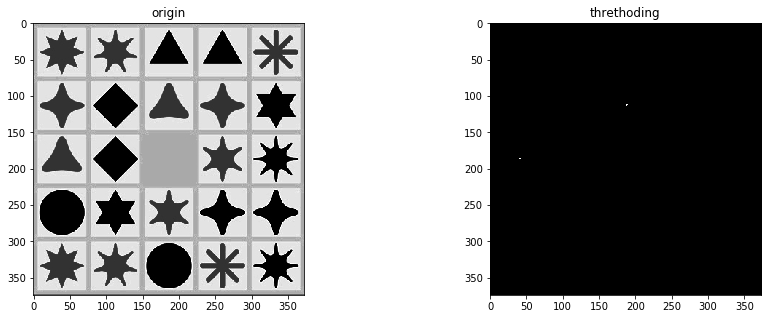

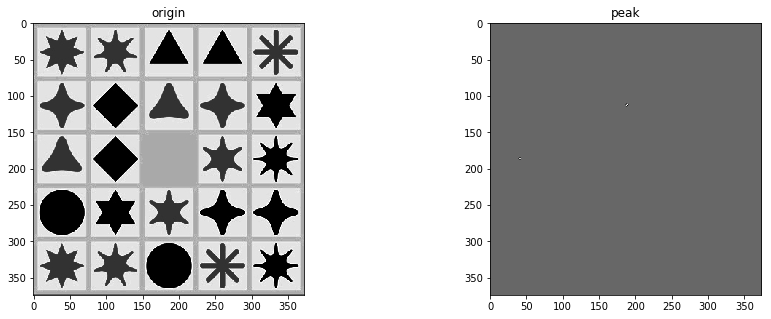

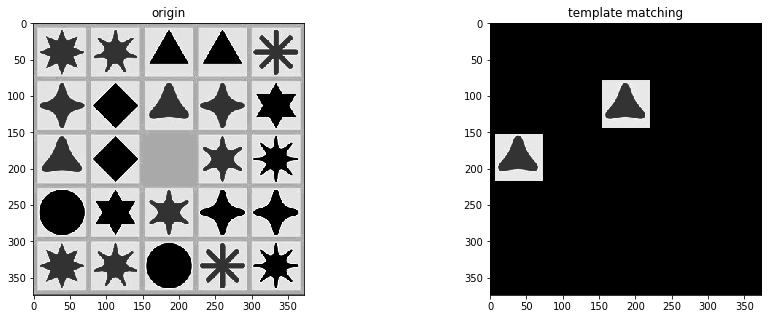

In [12]:
#template matching
toph=80
both=145
lftw=155
rgtw=220
threthod=0.95
#main
grey_lvl=grey_kernel(imageMatrix2)    #grey_lvl  [pixels,3]
squ=squ_image(grey_lvl,img2h,img2w)
tmpl=squ[toph:both,lftw:rgtw]
rgb_lvl=rgb_kernel(tmpl)
showpic_g(img2,rgb_lvl,name="template")

C = conv_2d(tmpl,squ,mode=2)
newC = np.zeros(squ.shape)
newC[int((both-toph)/2):int(-(both-toph)/2),int((rgtw-lftw)/2):int(-(rgtw-lftw)/2)]=C
rgb_lvl=rgb_kernel(newC)
showpic_g(img2,rgb_lvl,name="correlation")

final=newC
final[newC<threthod]=0.0
rgb_lvl=rgb_kernel(final)
showpic_g(img2,rgb_lvl,name="threthoding")

peak=conv_2d(peak_lp,final[int((both-toph)/2):int(-(both-toph)/2),int((rgtw-lftw)/2):int(-(rgtw-lftw)/2)])
newPK=np.zeros(squ.shape)
newPK[int((both-toph)/2)+1:int(-(both-toph)/2)-1,int((rgtw-lftw)/2)+1:int(-(rgtw-lftw)/2)-1]=peak
rgb_lvl=rgb_kernel(newPK)
showpic_g(img2,rgb_lvl,name="peak")

revised_img=np.zeros(squ.shape)
for i in range(1,peak.shape[0]-1):
    for j in range(1,peak.shape[1]-1):
        if peak[i,j]>peak[i-1,j] and peak[i,j]>peak[i,j-1] and peak[i,j]>peak[i+1,j] and peak[i,j]>peak[i,j+1]:
            revised_img[i:i+tmpl.shape[0],j:j+tmpl.shape[1]]=tmpl
rgb_lvl=rgb_kernel(revised_img)
showpic_g(img2,rgb_lvl,name="template matching")
